# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [69]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# SELV
import itertools as it
from scipy import optimize as opt

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [45]:
##We define the function:

In [73]:
# Defining utility
m = 1
v = 10
eps = 0.3
tau_0 = 0.4
tau_1 = 0.1
k = 0.4
w=1
def utility(c,l,v,eps):
    u = np.log(c) - v*(l**(1+1/eps)/(1+1/eps))
    return u

# Defining constraint

def eq(m,w,l,tau_0,tau_1,k):
    x = m + w*l - (tau_0*w*l + tau_1*np.max(w*l-k,0))
    return x

# Defining utility based on optimal consumption

def choice(l,w,eps,v,tau_0,tau_1,k,m):
    c = eq(m,w,l,tau_0,tau_1,k)
    return -utility(c,l,v,eps)

# Defining function to optimize labour supply

def optimizer(w,eps,v,tau_0,tau_1,k,m):
    res = opt.minimize_scalar(
    choice, method='bounded',
    bounds=(0,1), args=(w,eps,v,tau_0,tau_1,k,m))
    
    l_star = res.x
    c_star = eq(m,w,l_star,tau_0,tau_1,k)
    utility_star = utility(c_star,l_star,v,eps)
    
    return l_star,c_star,utility_star

In [74]:
optimizer(w,eps,v,tau_0,tau_1,k,m)

(0.3824630518597855, 1.2312315259298927, 0.17217235004531845)

# Question 2

ADD ANSWER.

In [75]:
#SVAR ved w=1
optimizer(w,eps,v,tau_0,tau_1,k,m)

(0.3824630518597855, 1.2312315259298927, 0.17217235004531845)

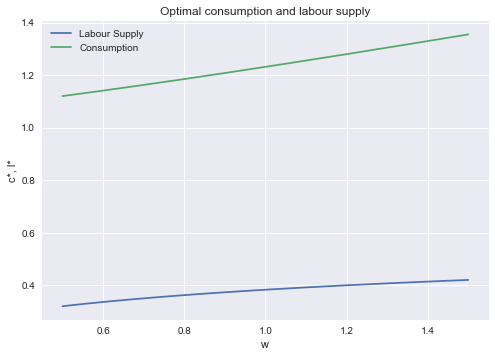

In [78]:
# code
N=10000
w_vec = np.linspace(0.5, 1.5, N)
l_vec = np.empty(N)
c_vec = np.empty(N)

for i,w in enumerate(w_vec) :
    bundle=optimizer(w,eps,v,tau_0,tau_1,k,m)
    l_vec[i]=bundle[0]
    c_vec[i]=bundle[1]

plt.plot(w_vec, l_vec)
plt.plot(w_vec, c_vec)
plt.grid(True)
plt.xlabel("w")
plt.ylabel("c*, l*")
plt.legend(["Labour Supply", "Consumption"])
plt.title("Optimal consumption and labour supply")
plt.show()

# Question 3

ADD ANSWER.

In [41]:
# code hey
# code
#T
import numpy as np
N=10000
def total_tax(v=10,epsilon=0.3,m=1,tau_0=0.4,tau_1=0.1,k=0.4,N=600,do_print=True):
    total_tax=0
    np.random.seed(1121)
    for i in range(1,N+1):
        w_i = np.random.uniform(low=0.5,high=1.5)
        l_i, _, _ = find_best_choice(v=10,epsilon=0.3,m=1,w=w_i,tau_0=0.4,tau_1=0.1,k=0.4,N=600,do_print=True)
        total_tax += (tau_0*w_i*l_i+tau_1*np.max(w_i*l_i-k,0))
    return total_tax

T=total_tax(v=10,epsilon=0.3,m=1,tau_0=0.4,tau_1=0.1,k=0.4,N=600,do_print=True)



c = 1.22407239
l = 0.37896494
u  = 0.16773984
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


TypeError: cannot unpack non-iterable NoneType object

# Question 4

ADD ANSWER.

In [ ]:
# code

# Question 5

ADD ANSWER.

In [ ]:
# code

# Conclusion

ADD CONCISE CONLUSION.